# Tarea. Vector Media, Matriz Covarianza y Componentes Principales 2D

Víctor David García Medina

## Parte 1: generar y graficar puntos en 2D que exhiban cierto grado de correlación en el cuarto cuadrante

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

La siguiente función tiene 3 parámetros con los que se generan puntos que exhiben un grado de correlación dada por la recta $y=mx$ a lo largo de un intervalo de longitud $b$. Por default se generan 10 datos pero es posible generar más

In [2]:
# m --> Pendiente de la recta
# b --> Longitud de dominio de la recta
# n --> Cantidad de puntos
def generar_punto_en_recta(m, b=10, n=10):
    datos = []
    for i in range(n):
        ruido_std = random.randint(0,5)
        x = random.uniform(-b, 0) 
        y = m * x 
        datos.append([x,y + np.random.normal(0, ruido_std)])
    return datos


Ahora generamos 10 puntos cercanos a la recta $y=-1.6x$ con el propósito de caer en el cuadrante $(-,+)$ y los graficamos

In [3]:
m = -1.6
b = 10
n = 10
puntos = generar_punto_en_recta(m, b, n)


Dividimos el array puntos tanto en las coordenadas $x$ como las coordenadas $y$ para poder graficar:

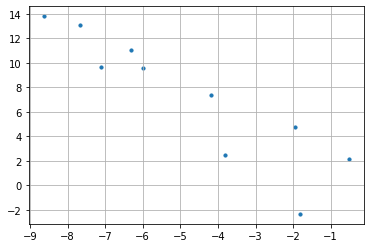

In [4]:
#colors = np.random.rand(len(x_coords))

x_coords = [punto[0] for punto in puntos]
y_coords = [punto[1] for punto in puntos]
plt.scatter(x_coords, y_coords, s=10 )
plt.grid(True)
plt.show()


## Parte2: Calcular el vector media y graficarlo

Ahora definimos una función que calcule el promedio, esta función toma como parámetro un array pues queremos aprovechar los arrays x_coord, y_coords

In [5]:
def promedio(array):
    promedio = sum(array) / len(array)
    return promedio
    

Creamos el vector promedio usando la función:

In [6]:
vector_prom=[promedio(x_coords),promedio(y_coords)]
print(vector_prom)


[-4.798113105923146, 7.151046222130046]


Ahora graficamos el vector promedio

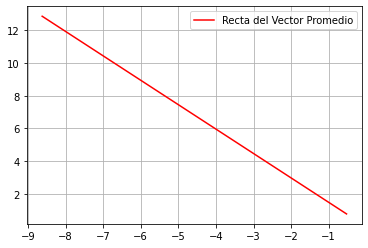

In [7]:
x_line = np.linspace(min(x_coords), max(x_coords), 100)
y_line = (vector_prom[1]/vector_prom[0]) * x_line
plt.plot(x_line, y_line, label='Recta del Vector Promedio', color='red')
plt.legend()
plt.grid(True)
plt.show()

Ahora veamos cómo se ven los puntos y el vector promedio en el mismo plot

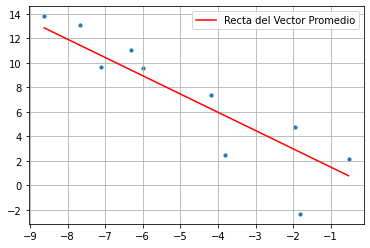

In [8]:

x_line = np.linspace(min(x_coords), max(x_coords), 100)
y_line = (vector_prom[1]/vector_prom[0]) * x_line
plt.scatter(x_coords, y_coords, s=10 )
plt.plot(x_line, y_line, label='Recta del Vector Promedio', color='red')
plt.legend()
plt.grid(True)
plt.show()

## Parte3: Calcular la matriz covarianza y correlación

La matriz de covarianza en este caso está dada por \begin{bmatrix}
Cov(X,X) & Cov(X,Y) \\
Cov(Y,X) & Cov(Y,Y)
\end{bmatrix}

donde $Cov(X,Y)=\frac{1}{n-1}\sum ( (X - \bar{X}  )(Y - \bar{Y}  )$, definamos entonces una función que calcule las covarianzas


In [9]:
def cov(X,Y):
    mean_X = promedio(X)
    mean_Y = promedio(Y)
    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / (n - 1)
    return covariance

In [10]:
matriz_covarianza = [
    [cov(x_coords,x_coords), cov(x_coords, y_coords)],
    [cov(y_coords,x_coords), cov(y_coords, y_coords)]
]

La matriz de covarianza es

In [11]:
for fila in matriz_covarianza:
    print(fila)

[7.616398327005421, -13.142539858076198]
[-13.142539858076198, 27.77791674057749]


Antes de continuar podemos notar por la definición de covarianza que se cumple la siguiente igualdad:
$$Cov(X,X)=\sigma^{2}_X$$
Es decir, cuando calculamos la covarianza de una variable consigo misma obtenemos, por definición, la varianza: el cuadrado de la desviación estandar.

Ahora, la matriz de correlación está definida por
\begin{bmatrix}
\frac{Cov(X,X)}{\sigma^2_X} & \frac{Cov(X,Y)}{\sigma_X \sigma_Y} \\
\frac{Cov(Y,X)}{\sigma_Y \sigma_X} & \frac{Cov(Y,Y)}{\sigma^2_Y }
\end{bmatrix}

Pero si tomamos en cuenta la observación recién hecha entonces podemos reescribir esta matriz de correlación como:
\begin{bmatrix}
1 & \frac{Cov(X,Y)}{\sigma_X \sigma_Y} \\
\frac{Cov(Y,X)}{\sigma_Y \sigma_X} & 1
\end{bmatrix}
Con esta información y la que ya hemos conseguido basta con calcular los valores de $\sigma_X$ y $\sigma_Y$



In [12]:
std_dev_x = math.sqrt(matriz_covarianza[0][0])
std_dev_y = math.sqrt(matriz_covarianza[1][1])

Ahora construimos la matriz de correlación

In [13]:
matriz_correlacion = [[1, matriz_covarianza[0][1] / (std_dev_x * std_dev_y)],
                      [matriz_covarianza[1][0] / (std_dev_y * std_dev_x), 1]]


In [14]:
for fila in matriz_correlacion:
    print(fila)

[1, -0.9035551017189238]
[-0.9035551017189238, 1]


## Parte4: Concluciones 

El valor -0.9035551017189238 en la posición (1, 2) y (2, 1) indica que existe una correlación negativa fuerte entre las variables $x$ $y$. Esto significa que cuando una variable aumenta, la otra tiende a disminuir y viceversa.

La matriz tiene valores cercanos a 1 en la diagonal principal, lo que indica que cada variable tiene una correlación perfecta consigo misma. Esto es normal ya que una variable siempre está perfectamente correlacionada con sí misma y esto puede notarse con la forma en la que relacionamos la covarianza, la varianza y la desviación estandar.